In [311]:
import h5py as h5
import arepo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from scipy.interpolate import interp1d
from scipy.stats import binned_statistic_2d
from numba import njit
import importlib
import galaxy

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [309]:
sfr = {}
# sfr['MW7iso_l5']   = np.genfromtxt(basepath + 'runs/MW7iso/lvl5-Ngb64/output/sfr.txt')
sfr['MW7_GSE4_l5']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-denscut/output/sfr.txt')
# sfr['MW7_GSE4_l5_rcut'] = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-rcut/output/sfr.txt')
sfr['MW7_GSE4_Ngb64_l5']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-denscut-Ngb64/output/sfr.txt')
# sfr['MW7_GSE4_steep1_l5']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-denscut-Ngb64-steep1/output/sfr.txt')
# sfr['MW7_GSE4_steep3_l5']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-denscut-Ngb64-steep3/output/sfr.txt')
# sfr['MW7_GSE4_fb01_l5'] = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-fb01-Ngb64/output/sfr.txt')

sfr['MW7_GSE4_l4']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl4-denscut/output-BADrcut/sfr.txt')

sfr['MW7_GSE4_Vv110_Ngb64_l5']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-denscut-Vvir110-Ngb64/output/sfr.txt')
# sfr['MW7_GSE4_Rs100_Vv110_Ngb64_l5']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-denscut-Rstart100-Vvir110-Ngb64/output/sfr.txt')
# sfr['MW7_GSE4_Rs150_Vv110_Ngb64_l5']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl5-denscut-Rstart150-Vvir110-Ngb64/output/sfr.txt')

# sfr['MW7iso_l4']   = np.genfromtxt(basepath + 'runs/MW7iso/lvl4-Ngb64/output/sfr.txt')
sfr['MW7_GSE4_Ngb64_l4']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl4-denscut-Ngb64/output/sfr.txt')
sfr['MW7_GSE4_Vv110_Ngb64_l4']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl4-denscut-Vvir110-Ngb64/output/sfr.txt')

# sfr['MW7_GSE4_Ngb64_l4']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl4-denscut-Ngb64/output/sfr.txt')
# sfr['MW7_GSE4_steep1_l4']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl4-denscut-Ngb64-steep1/output/sfr.txt')
# sfr['MW7_GSE4_steep3_l4']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl4-denscut-Ngb64-steep3/output/sfr.txt')

sfr['MW7_GSE4_l3']   = np.genfromtxt(basepath + 'runs/MW7_GSE4/lvl3-denscut/output/sfr.txt')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 15.0)

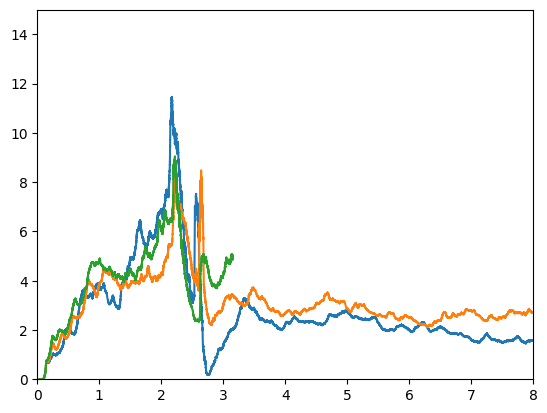

In [310]:
plt.close()
plt.plot(sfr['MW7_GSE4_l5'][:,0], sfr['MW7_GSE4_l5'][:,2])
# plt.plot(sfr['MW7_GSE4_Ngb64_l5'][:,0], sfr['MW7_GSE4_Ngb64_l5'][:,2], label='lvl5')
# plt.plot(sfr['MW7_GSE4_l5_rcut'][:,0], sfr['MW7_GSE4_l5_rcut'][:,2])
# plt.plot(sfr['MW7_GSE4_Vv110_Ngb64_l5'][:,0], sfr['MW7_GSE4_Vv110_Ngb64_l5'][:,2], label='lvl5 (Vv110)')
# plt.plot(sfr['MW7_GSE4_Ngb64_l4'][:,0], sfr['MW7_GSE4_Ngb64_l4'][:,2], label='lvl4')
# plt.plot(sfr['MW7_GSE4_Vv110_Ngb64_l4'][:,0], sfr['MW7_GSE4_Vv110_Ngb64_l4'][:,2], label='lvl4 (Vv110)')
plt.plot(sfr['MW7_GSE4_l4'][:,0], sfr['MW7_GSE4_l4'][:,2])
# plt.plot(sfr['MW7_GSE4_fb01_l5'][:,0], sfr['MW7_GSE4_fb01_l5'][:,2])
# plt.plot(sfr['MW7_GSE4_Vv110_Ngb64_l5'][:,0], sfr['MW7_GSE4_Vv110_Ngb64_l5'][:,2])
# plt.plot(sfr['MW7_GSE4_Rs100_Vv110_Ngb64_l5'][:,0], sfr['MW7_GSE4_Rs100_Vv110_Ngb64_l5'][:,2])
# plt.plot(sfr['MW7_GSE4_Rs150_Vv110_Ngb64_l5'][:,0], sfr['MW7_GSE4_Rs150_Vv110_Ngb64_l5'][:,2])
# plt.plot(sfr['MW7_GSE4_Ngb64_l5'][:,0], sfr['MW7_GSE4_Ngb64_l5'][:,2])
plt.plot(sfr['MW7_GSE4_l3'][:,0], sfr['MW7_GSE4_l3'][:,2])
# plt.plot(sfr['MW7_GSE4_Ngb64_l5'][:,0], sfr['MW7_GSE4_Ngb64_l5'][:,2])
# plt.plot(sfr['MW7_GSE4_Ngb64_l4'][:,0], sfr['MW7_GSE4_Ngb64_l4'][:,2])
# plt.plot(sfr['MW7_GSE4_Ngb64_l3'][:,0], sfr['MW7_GSE4_Ngb64_l3'][:,2])
# plt.plot(sfr['MW7_GSE4_steep_lvl5'][:,0], sfr['MW7_GSE4_steep_lvl5'][:,2])
# plt.plot(sfr['MW7_GSE4_steep_lvl4'][:,0], sfr['MW7_GSE4_steep_lvl4'][:,2])
# plt.plot(sfr['MW7_GSE4_steep3_l5'][:,0], sfr['MW7_GSE4_steep3_l5'][:,2])
# plt.plot(sfr['MW7_GSE4_steep3_l4'][:,0], sfr['MW7_GSE4_steep3_l4'][:,2])
plt.legend(frameon=False)
plt.xlim(0, 8)
plt.ylim(0, 15)

In [280]:
sn_dens = arepo.Snapshot(basepath + 'runs/MW7_GSE4/lvl5-denscut/output', 0)
sn_dens64 = arepo.Snapshot(basepath + 'runs/MW7_GSE4/lvl5-denscut-Ngb64/output', 0)
sn_rcut = arepo.Snapshot(basepath + 'runs/MW7_GSE4/lvl5-rcut/output', 0)

for sn in [sn_dens, sn_dens64, sn_rcut]:
    print(sn.NumPart_Total)

[187345 275749      0      0      0      1]
[187345 275749      0      0      0      1]
[179584 275749      0      0      0      1]


(0.0, 15.0)

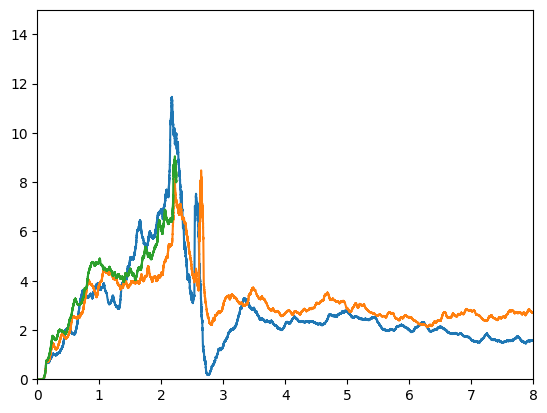

In [242]:
plt.plot(sfr['MW7_GSE4_l5'][:,0], sfr['MW7_GSE4_l5'][:,2])
plt.plot(sfr['MW7_GSE4_l4'][:,0], sfr['MW7_GSE4_l4'][:,2])
plt.plot(sfr['MW7_GSE4_l3'][:,0], sfr['MW7_GSE4_l3'][:,2])
# plt.plot(sfr['MW7_GSE4_Ngb64_l5'][:,0], sfr['MW7_GSE4_Ngb64_l5'][:,2])
# plt.plot(sfr['MW7_GSE4_Ngb64_l4'][:,0], sfr['MW7_GSE4_Ngb64_l4'][:,2])
# plt.plot(sfr['MW7_GSE4_Ngb64_l3'][:,0], sfr['MW7_GSE4_Ngb64_l3'][:,2])
# plt.plot(sfr['MW7_GSE4_steep_lvl5'][:,0], sfr['MW7_GSE4_steep_lvl5'][:,2])
# plt.plot(sfr['MW7_GSE4_steep_lvl4'][:,0], sfr['MW7_GSE4_steep_lvl4'][:,2])
# plt.plot(sfr['MW7_GSE4_steep3_l5'][:,0], sfr['MW7_GSE4_steep3_l5'][:,2])
# plt.plot(sfr['MW7_GSE4_steep3_l4'][:,0], sfr['MW7_GSE4_steep3_l4'][:,2])
plt.xlim(0, 8)
plt.ylim(0, 15)

In [303]:
idx = 240
gals = {}
gals['MW7iso_l5'] = galaxy.Galaxy(basepath + 'runs/MW7iso/lvl5-Ngb64/output', idx, orient=True)
gals['MW7_GSE4_l5'] = galaxy.Galaxy(basepath + 'runs/MW7_GSE4/lvl5-denscut-Ngb64/output', idx, orient=True)
gals['MW7_GSE4_Vv110_l5'] = galaxy.Galaxy(basepath+'runs/MW7_GSE4/lvl5-denscut-Vvir110-Ngb64/output', 
                                          idx, orient=True)

gals['MW7iso_l4'] = galaxy.Galaxy(basepath + 'runs/MW7iso/lvl4-Ngb64/output', idx, orient=True)
gals['MW7_GSE4_l4'] = galaxy.Galaxy(basepath + 'runs/MW7_GSE4/lvl4-denscut-Ngb64/output', idx, orient=True)
gals['MW7_GSE4_Vv110_l4'] = galaxy.Galaxy(basepath+'runs/MW7_GSE4/lvl4-denscut-Vvir110-Ngb64/output', 
                                          idx, orient=True)

In [160]:
def get_logFeH_logMgFe(gal, ptype=4):
    GFM_SOLAR_ABUNDANCE_HYDROGEN = 0.7388
    GFM_SOLAR_ABUNDANCE_MAGNESIUM = 0.0007
    GFM_SOLAR_ABUNDANCE_IRON   =   0.0013
    
    part = getattr(gal.sn, 'part'+str(ptype))
    
    FeH = part.GFM_Metals[:,8] / GFM_SOLAR_ABUNDANCE_IRON
    logFeH = np.log10(FeH)

    MgH = part.GFM_Metals[:,6] / GFM_SOLAR_ABUNDANCE_MAGNESIUM
    MgFe = MgH/FeH
    logMgH = np.log10(MgH)
    logMgFe = np.log10(MgFe)
    
    return logFeH, logMgH, logMgFe

In [298]:
def in_SN(gal, ptype, Rmin=4, Rmax=16, zmin=0, zmax=3):
    part = getattr(gal.sn, 'part'+str(ptype))
    R = np.linalg.norm(part.rotpos[:,:2], axis=1)
    z = part.rotpos[:,2]
    key_R = np.logical_and(R < Rmax, R > Rmin)
    key = np.logical_and(key_R, np.abs(z) < zmax)
    key = np.logical_and(key, np.abs(z) > zmin)
    
    return key
    
def plot_map(fig, ax, gal, scalar=None, subsamp=None, tform_min=0, tform_max=10,
             Rmin=4, Rmax=16, zmin=0, zmax=3, exclude=None):
    
    # vmin = None
    # vmax = 0.008
    # vmax = None
    
    logFeH, logMgH, logMgFe = get_logFeH_logMgFe(gal)
    
    key = in_SN(gal, 4, Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
    
    tform = gal.sn.part4.GFM_StellarFormationTime
    key = np.logical_and(key, tform > tform_min)
    key = np.logical_and(key, tform < tform_max)
    
    if exclude is not None:
        key_low = np.logical_and(key, tform < exclude[0])
        key_high = np.logical_and(key, tform > exclude[1])
        key = np.logical_or(key_low, key_high)
    
    mass = np.copy(gal.sn.part4.mass.value)
    
    if scalar is not None:
        mass *= gal.sn.part4.PassiveScalars[:,scalar]
    
    # key = np.logical_and(key, logMgFe > 0.3)
    
    print(np.sum(mass[key]))
    
    if subsamp is not None and np.sum(key) > subsamp:
        key_w = np.where(key)[0]
        key_w = np.random.choice(key_w, subsamp, replace=False)
        key = np.full(len(key), False)
        key[key_w] = True
        print('subsampled to:', np.sum(key))

    # logFeH_bins  = np.linspace(-1, 0.75, 75)
    # logMgFe_bins = np.linspace(0.15, 0.4, 75)
    
    logFeH_bins  = np.linspace(-0.9, 0.6, 50) - 0.2
    logMgFe_bins = np.linspace(-0.05, 0.45, 50) + 0.2

    mbin, x_edge, y_edge, _ = binned_statistic_2d(logFeH[key], logMgFe[key], mass[key], 
                                                     statistic='sum', bins=[logFeH_bins, logMgFe_bins])

    # downstairs = np.max(mbin, axis=1)
    vmin = 0.01
    vmax = 0.15
    
    downstairs = np.sum(mbin, axis=1)
    # vmin = 0.01
    # vmax = 0.2
    
    downstairs[downstairs == 0.0] = 1e-20
    mbin = (mbin.T / downstairs).T
    mbin[mbin < vmin] = vmin
    
    extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]
    
    # vmin=1e-5
    # vmax=0.0001
    norm = None
    vmin = None
    vmax = None
    norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
    # norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    # norm = mpl.colors.PowerNorm(gamma=0.3)
    im = ax.imshow(mbin.T, origin='lower',
               extent=extent,
               norm=norm)

    ax.set_xlim(extent[0], extent[1])
    ax.set_ylim(extent[2], extent[3])
    ax.set_aspect('auto')
    
    return im

0.18404251
0.14557773
0.19645329
0.22969072
0.26250854
0.2735559


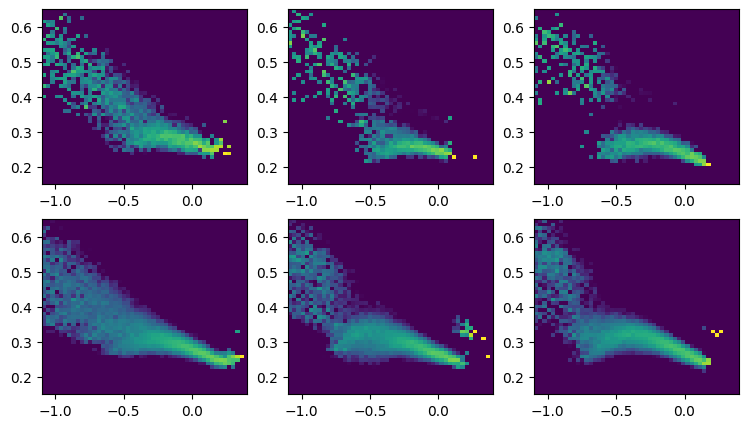

In [304]:
fig, axs = plt.subplots(2, 3, figsize=(9, 5))

# Rmin = 5
# Rmax = 11
# zmax = 3
Rmin = 6
Rmax = 11
zmin = 0
zmax = 3

plot_map(fig, axs[0][0], gals['MW7iso_l5'], Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
plot_map(fig, axs[0][1], gals['MW7_GSE4_l5'], Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
plot_map(fig, axs[0][2], gals['MW7_GSE4_Vv110_l5'], Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)

plot_map(fig, axs[1][0], gals['MW7iso_l4'], Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
plot_map(fig, axs[1][1], gals['MW7_GSE4_l4'], Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
plot_map(fig, axs[1][2], gals['MW7_GSE4_Vv110_l4'], Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)

0.009189742
0.011363992
0.011675868
0.0007874801
0.0009865056
0.0010466916


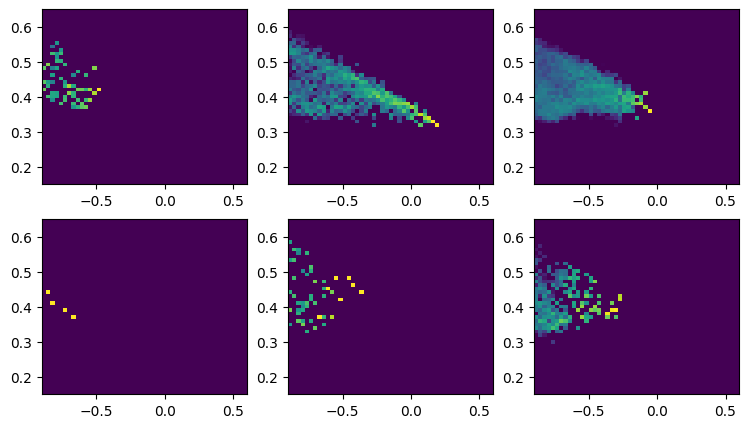

In [248]:
fig, axs = plt.subplots(2, 3, figsize=(9, 5))

# Rmin = 5
# Rmax = 11
# zmax = 3
Rmin = 5
Rmax = 11
zmin = 0
zmax = 3

plot_map(fig, axs[0][0], gals['MW7_GSE4_l5'], Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
plot_map(fig, axs[0][1], gals['MW7_GSE4_l4'], Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
plot_map(fig, axs[0][2], gals['MW7_GSE4_l3'], Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)

Rmin = 6
Rmax = 9
zmin = 1
zmax = 2

plot_map(fig, axs[1][0], gals['MW7_GSE4_l5'], Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
plot_map(fig, axs[1][1], gals['MW7_GSE4_l4'], Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
plot_map(fig, axs[1][2], gals['MW7_GSE4_l3'], Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)

0.008116696
0.01602003


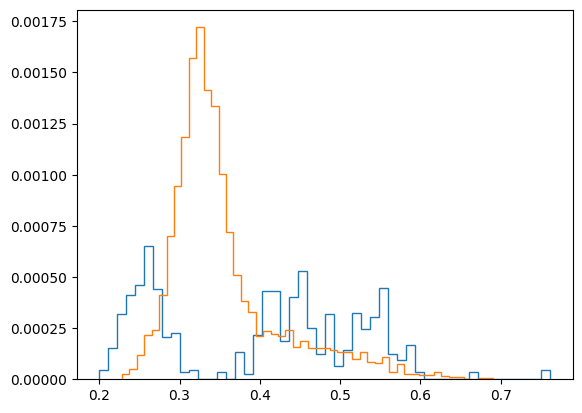

In [305]:
gal = gals['MW7_GSE4_Vv110_l5']

Rmin = 5
Rmax = 9
zmin = 1
zmax = 2

logFeH_min = -0.7-0.5
logFeH_max = -0.7+0.3

is_in_SN = in_SN(gal, 4, Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
logFeH, logMgH, logMgFe = get_logFeH_logMgFe(gal)

key = np.logical_and(logFeH > logFeH_min, logFeH < logFeH_max)
# key = np.logical_and(logFeH > -1e9, logFeH < 1e9)
key = np.logical_and(key, is_in_SN)

# tform = gal.sn.part4.GFM_StellarFormationTime
# key = np.logical_and(key, tform > 0)
# key_low = np.logical_and(key, tform < 3)
# key_high = np.logical_and(key, tform > 5)
# key = np.logical_or(key_low, key_high)
print(np.sum(gal.sn.part4.mass.value[key]))
plt.hist(logMgFe[key], bins=50, histtype='step', weights=gal.sn.part4.mass.value[key], label='lvl5');

gal = gals['MW7_GSE4_Vv110_l4']
is_in_SN = in_SN(gal, 4, Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
logFeH, logMgH, logMgFe = get_logFeH_logMgFe(gal)

key = np.logical_and(logFeH > logFeH_min, logFeH < logFeH_max)
# key = np.logical_and(logFeH > -1e9, logFeH < 1e9)
key = np.logical_and(key, is_in_SN)
print(np.sum(gal.sn.part4.mass.value[key]))
plt.hist(logMgFe[key], bins=50, histtype='step', weights=gal.sn.part4.mass.value[key], label='lvl5 (Vv110)');
# plt.yscale('log')

1690
1690


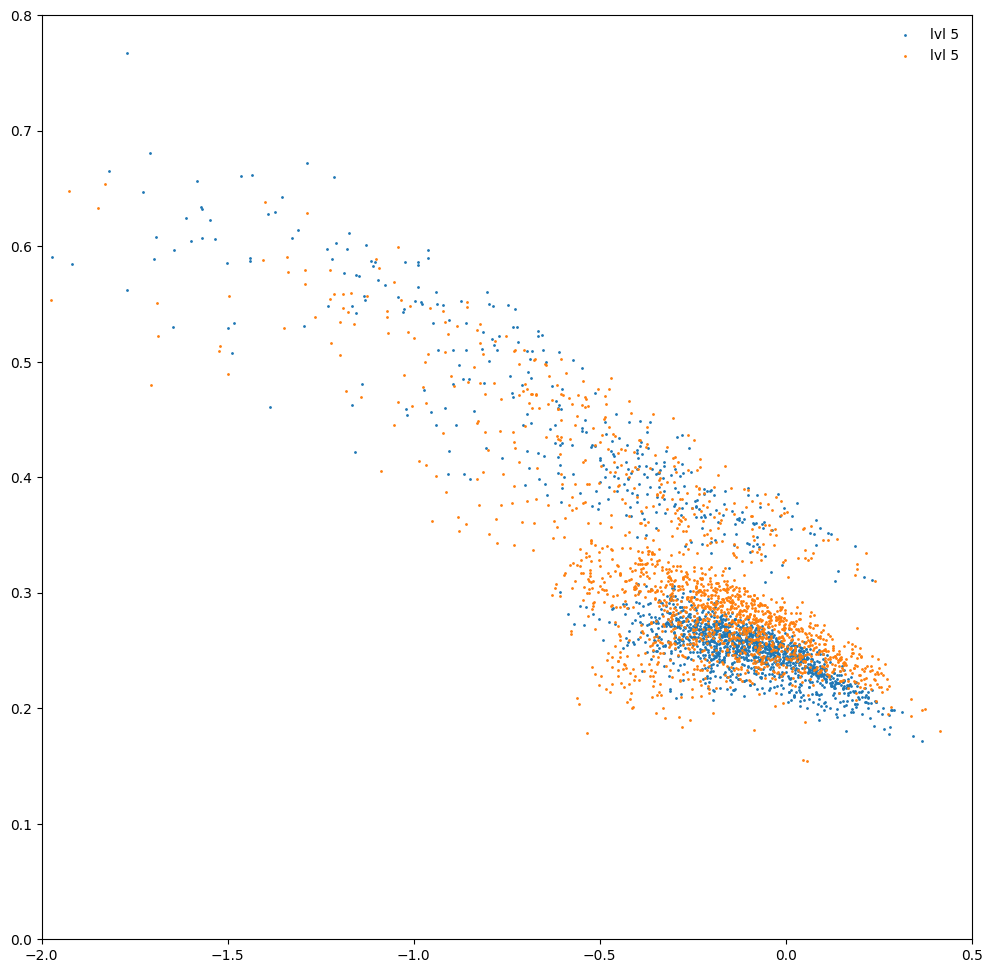

In [220]:
Rmin = 5
Rmax = 9
zmin = 1
zmax = 2

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

Nsamp = 1690

gal = gals['MW7_GSE4_l5']
is_in_SN = in_SN(gal, 4, Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
tform = sn.part4.GFM_StellarFormationTime < 3
is_old_in_SN = np
key = np.where(is_in_SN)[0]
key = np.random.choice(key, Nsamp, replace=False)
logFeH, logMgH, logMgFe = get_logFeH_logMgFe(gal)
ax.scatter(logFeH[key], logMgFe[key], s=1, label='lvl 5')
print(len(key))

gal = gals['MW7_GSE4_l4']
is_in_SN = in_SN(gal, 4, Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
key = np.where(is_in_SN)[0]
key = np.random.choice(key, Nsamp, replace=False)
logFeH, logMgH, logMgFe = get_logFeH_logMgFe(gal)
ax.scatter(logFeH[key], logMgFe[key], s=1, label='lvl 5')
print(len(key))

ax.set(xlim=(-2, 0.5), ylim=(0, 0.8))
ax.legend(frameon=False)

1690
1690


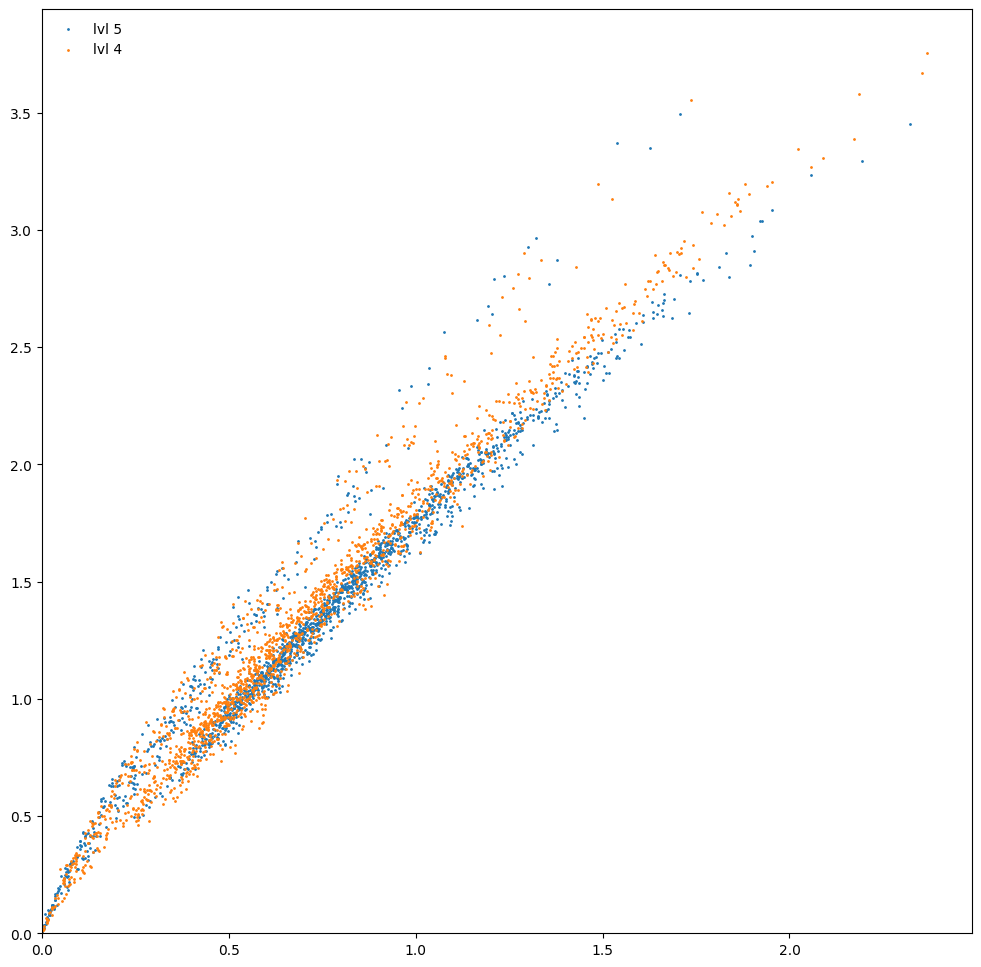

In [222]:
Rmin = 5
Rmax = 9
zmin = 1
zmax = 2

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

Nsamp = 1690

gal = gals['MW7_GSE4_l5']
is_in_SN = in_SN(gal, 4, Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
key = np.where(is_in_SN)[0]
key = np.random.choice(key, Nsamp, replace=False)
logFeH, logMgH, logMgFe = get_logFeH_logMgFe(gal)
ax.scatter(10.**logFeH[key], 10.**logMgH[key], s=1, label='lvl 5')
print(len(key))

gal = gals['MW7_GSE4_l4']
is_in_SN = in_SN(gal, 4, Rmin=Rmin, Rmax=Rmax, zmin=zmin, zmax=zmax)
key = np.where(is_in_SN)[0]
key = np.random.choice(key, Nsamp, replace=False)
logFeH, logMgH, logMgFe = get_logFeH_logMgFe(gal)
ax.scatter(10.**logFeH[key], 10.**logMgH[key], s=1, label='lvl 4')
print(len(key))

ax.set(xlim=(0, None), ylim=(0, None))
ax.legend(frameon=False)
    

(1.0, 4.0)

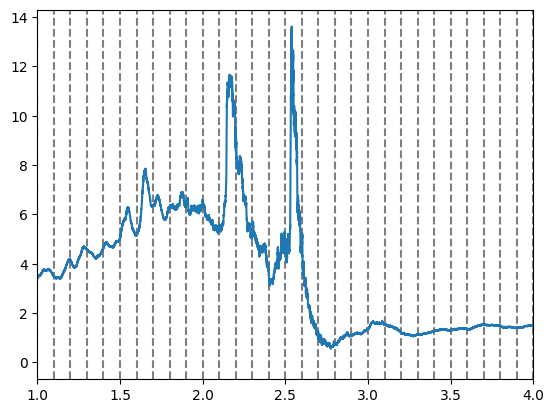

In [112]:
name = 'MW7_GSE4_steep1_l5'
idx_list = np.arange(40, 320+1, 4)
for idx in idx_list:
    plt.axvline(0.025*idx, c='k', ls='dashed', alpha=0.5)
plt.plot(sfr[name][:,0], sfr[name][:,2])
plt.xlim(1, 4)

In [250]:
idx_list = np.arange(40, 160+1, 10)
gals_idx = {}
for idx in tqdm(idx_list):
    gals_idx[idx] = galaxy.Galaxy(basepath + 'runs/MW7_GSE4/lvl5-denscut/output', idx, orient=True)

100%|██████████| 13/13 [00:05<00:00,  2.52it/s]


In [114]:
logaveMgFe = []
Time = []
sfr_disk = []
for idx in gals_idx.keys():
    gal = gals_idx[idx]
    sn = gal.sn
    r = np.linalg.norm(sn.part0.rotpos, axis=1)
    
    is_in_SN = r < 10
    
    logFeH, logMgH, logMgFe = get_logFeH_logMgFe(gal, 0)
    mass = sn.part0.mass.value
    
    FeH = 10.**logFeH
    MgH = 10.**logMgH
    aveFe = np.mean(FeH[is_in_SN])
    aveMg = np.mean(MgH[is_in_SN])
    logaveMgFe.append(np.log10(aveMg/aveFe))
    
    Time.append(sn.Time.value)
    
    sfr_disk.append(np.sum(sn.part0.sfr.value[is_in_SN]))
    
logaveMgFe = np.array(logaveMgFe)
Time = np.array(Time)
sfr_disk = np.array(sfr_disk)

(0.0, 0.5894101649522782)

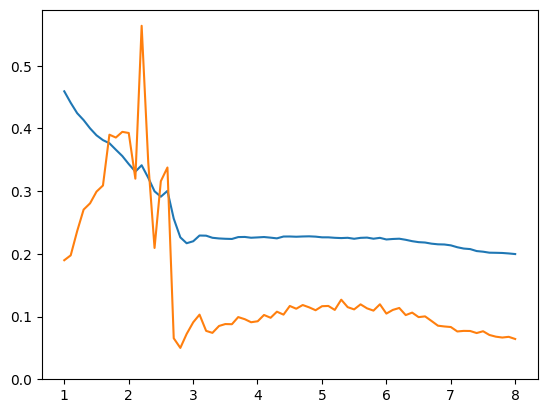

In [115]:
fig, ax = plt.subplots(1, 1)
ax.plot(Time, logaveMgFe)
ax.plot(Time, sfr_disk/15)
ax.set_ylim(0, None)

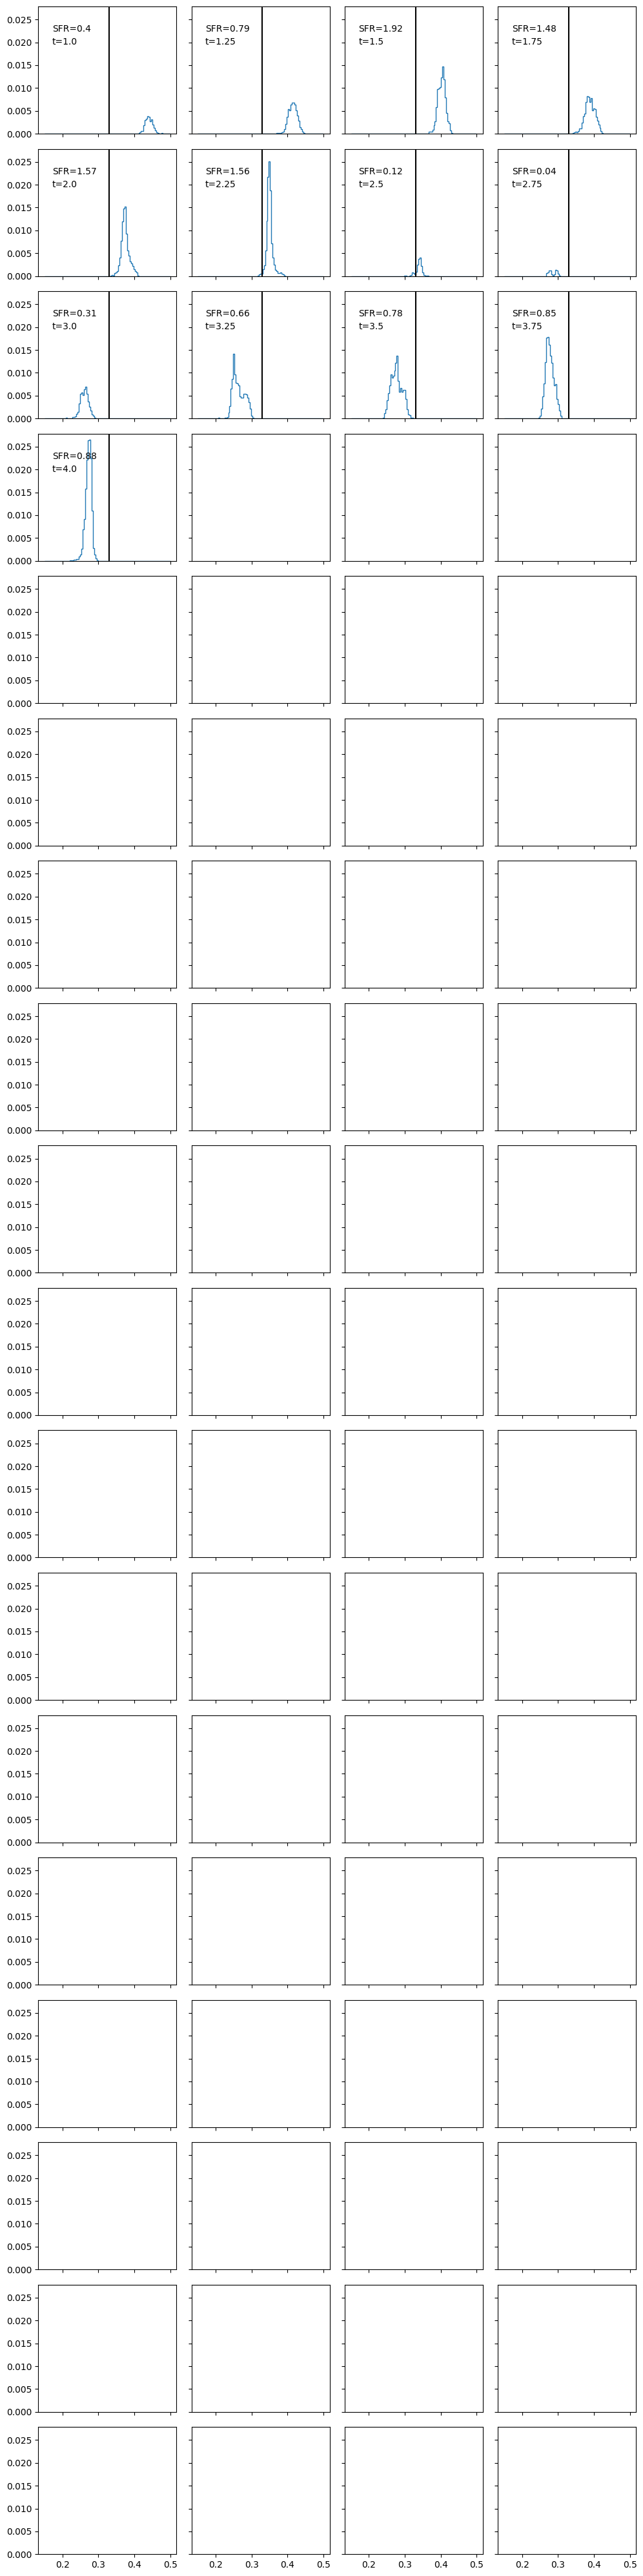

In [252]:
fig, axs = plt.subplots(18, 4, figsize=(10, 40), sharex=True, sharey=True)

for idx, ax in zip(gals_idx.keys(), axs.ravel()):
    gal = gals_idx[idx]
    sn = gal.sn
    
    bins = np.linspace(0.15, 0.5, 100)
    
    r = np.linalg.norm(sn.part0.rotpos, axis=1)
    is_in_SN = r < 10
    
    # is_in_SN = in_SN(gal, 0)
    
    is_sf = sn.part0.sfr > 0
    logFeH, logMgH, logMgFe = get_logFeH_logMgFe(gal, 0)
    mass = sn.part0.mass.value
    
    # Fekey0 = np.logical_and(logFeH > -0.5 - 0.1, logFeH < -0.5 + 0.1)
    Fekey1 = np.logical_and(logFeH > -0.25 - 0.1, logFeH < -0.25 + 0.1)
    # Fekey2 = np.logical_and(logFeH > 0 - 0.1, logFeH < 0 + 0.1)
    # Fekey3 = np.logical_and(logFeH > 0.25 - 0.1, logFeH < 0.25 + 0.1)
    
    
    
    # Fekey = np.full_like(is_sf, True)
    # for Fekey in [Fekey0, Fekey1, Fekey2, Fekey3]:
    Fekey = Fekey1
    if True:
        key = np.logical_and(Fekey, np.logical_and(is_in_SN, is_sf))
        ax.hist(logMgFe[key], weights=mass[key], bins=bins, histtype='step')
    
    # totsfr = np.sum(sn.part0.sfr[is_in_SN].value)
    totsfr = np.sum(sn.part0.sfr[key].value)
    
    ax.text(0.1, 0.8, 'SFR='+str(round(totsfr, 2)), transform=ax.transAxes)
    ax.text(0.1, 0.7, 't='+str(round(sn.Time.value, 2)), transform=ax.transAxes)
    
    ax.axvline(0.33, c='k')

fig.tight_layout()

In [153]:
def get_logFeH_logMgFe(sn, ptype=4):
    GFM_SOLAR_ABUNDANCE_HYDROGEN = 0.7388
    GFM_SOLAR_ABUNDANCE_MAGNESIUM = 0.0007
    GFM_SOLAR_ABUNDANCE_IRON   =   0.0013
    
    part = getattr(sn, 'part'+str(ptype))
    
    FeH = part.GFM_Metals[:,8] / GFM_SOLAR_ABUNDANCE_IRON
    logFeH = np.log10(FeH)

    MgH = part.GFM_Metals[:,6] / GFM_SOLAR_ABUNDANCE_MAGNESIUM
    MgFe = MgH/FeH
    logMgH = np.log10(MgH)
    logMgFe = np.log10(MgFe)
    
    return logFeH, logMgH, logMgFe

sn = arepo.Snapshot(basepath+'runs/MW7_GSE4/lvl5-denscut-Ngb64-steep1/output', 400)
sub = arepo.Subfind(basepath+'runs/MW7_GSE4/lvl5-denscut-Ngb64-steep1/output', 400)
rcut = 10

logFeH_bins  = np.linspace(-0.9, 0.6, 50)
logMgFe_bins = np.linspace(-0.05, 0.45, 50) + 0.2
    
logFeH, logMgH, logMgFe = get_logFeH_logMgFe(sn, ptype=0)
r = np.linalg.norm(sn.part0.pos.value - sub.SubhaloPos[0], axis=1)
    
mass = sn.part0.mass.value
sfr = sn.part0.sfr.value
    
key = r < rcut
massbin, x_edge, y_edge, _ = binned_statistic_2d(logFeH[key], logMgFe[key], mass[key], 
                                                     statistic='sum', bins=[logFeH_bins, logMgFe_bins])
    
sfrbin, x_edge, y_edge, _ = binned_statistic_2d(logFeH[key], logMgFe[key], sfr[key], 
                                                     statistic='sum', bins=[logFeH_bins, logMgFe_bins])

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]

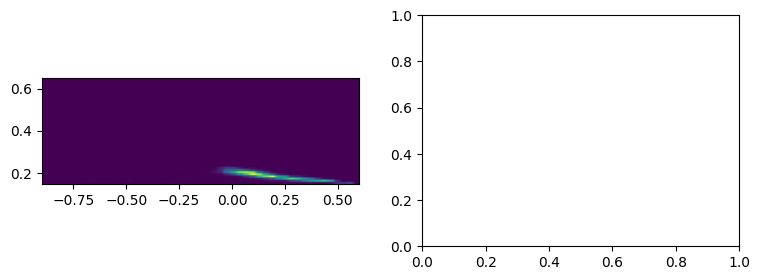

In [152]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
ax[0].imshow(massbin.T, origin='lower', extent=extent)